# **German Traffic Sign Recognition(GTSR)**

### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os

import cv2
from PIL import Image

import matplotlib.pyplot as plt

### Database Loading

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
!unrar x '/content/drive/MyDrive/germansign.rar' /content/dataset/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/germansign.rar


Would you like to replace the existing file /content/dataset/germansign/data.yaml
   829 bytes, modified on 2025-03-31 08:33
with a new one
   829 bytes, modified on 2025-03-31 08:33

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [23]:
!unrar x '/content/drive/MyDrive/germansigncnn.rar' /content/dataset/


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/germansigncnn.rar


Would you like to replace the existing file /content/dataset/archive(1)/data.yaml
   796 bytes, modified on 2025-03-31 06:48
with a new one
   796 bytes, modified on 2025-03-31 06:48

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


## **CNN Model**

### CNN Imports

In [5]:
# For the model and it's training
import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

### Data Preprocessing

In [6]:
# Setting variables for later use
data = []
labels = []
classes = 43
cur_path = os.getcwd()

# Retrieving the images and their labels
for i in range(classes):
    path = os.path.join('/content/dataset/archive(1)/images','train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [7]:
# Checking data shape
print(data.shape, labels.shape)

# Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Displaying the shape after the split
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


### CNN Train

In [8]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')  # Output layer (num_classes)
])

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.2669 - loss: 3.6758 - val_accuracy: 0.8279 - val_loss: 0.6036
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8124 - loss: 0.6482 - val_accuracy: 0.9575 - val_loss: 0.1699
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9079 - loss: 0.3113 - val_accuracy: 0.9642 - val_loss: 0.1236
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9407 - loss: 0.2154 - val_accuracy: 0.9787 - val_loss: 0.0818
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9461 - loss: 0.2043 - val_accuracy: 0.9777 - val_loss: 0.0839
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9553 - loss: 0.1742 - val_accuracy: 0.9806 - val_loss: 0.0739
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9674 - loss: 0.1167 - val_accuracy: 0.9774 - val_loss: 0.0878
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9637 - loss: 0.1403 - val_accuracy: 

### CNN Model Save

In [9]:
model.save('cnn.keras')

### CNN Model Load

In [10]:
model = keras.models.load_model('/content/drive/MyDrive/cnn.keras')

### CNN Visualization

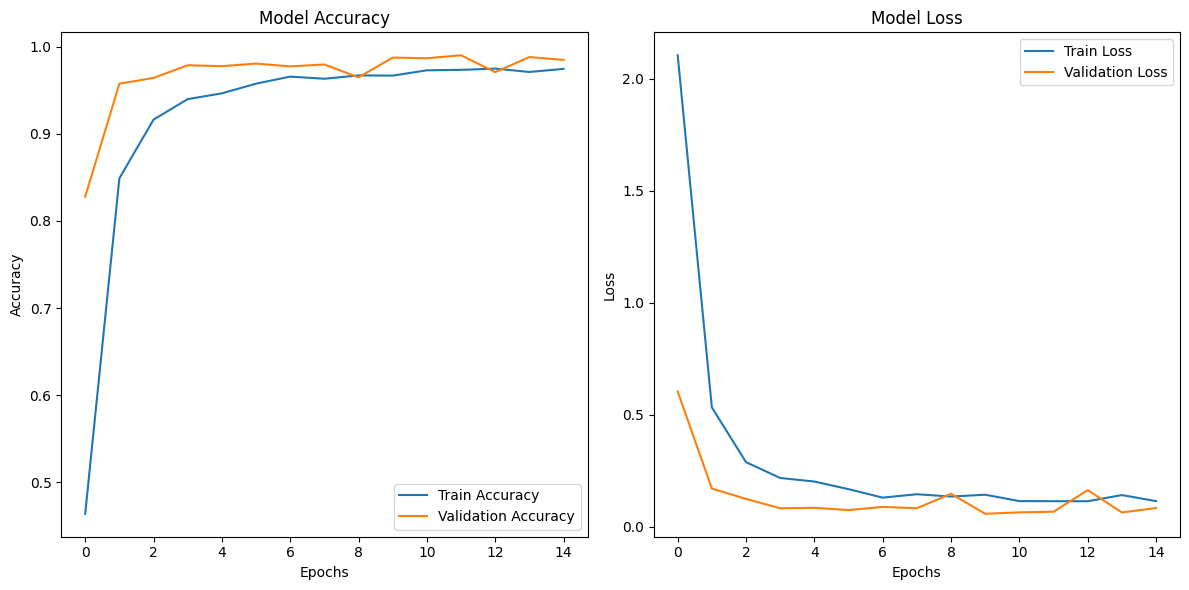

In [11]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### CNN Predict

In [12]:
y_test = pd.read_csv('/content/dataset/germansign/Test.csv')

# Extract the class labels and image paths
labels = y_test["ClassId"].values
images = y_test["Path"].values

# Preprocess the images
data = []
for img_path in images:
    image = Image.open('/content/dataset/germansign/' + img_path)  # Full path for the image
    image = image.resize((30, 30))  # Resize images to 32x32 (adjust to the input size for your model)
    data.append(np.array(image))

X_test = np.array(data)


# Make predictions using the model
predictions = model.predict(X_test)
pred = np.argmax(predictions, axis=-1)

# Calculate accuracy
accuracy = accuracy_score(labels, pred)
print(f"Accuracy on test data: {accuracy * 100:.2f}%")


395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy on test data: 95.01%


## **YOLOv5**

### YOLO Imports

In [13]:
# Install YOLOv5 and dependencies
!pip install torch torchvision torchaudio
!pip install matplotlib
!pip install -U opencv-python-headless
!pip install pycocotools
!pip install pandas
!pip install scikit-learn

# Clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

# Install requirements
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

Cloning into 'yolov5'...
remote: Enumerating objects: 17360, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 17360 (delta 36), reused 18 (delta 18), pack-reused 17308 (from 2)
Receiving objects: 100% (17360/17360), 16.24 MiB | 18.42 MiB/s, done.
Resolving deltas: 100% (11904/11904), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 22.4 MB/s eta 0:00:00


### YOLO Converting labels

In [14]:
def convert_annotations(dataset_type):
    # Define paths based on dataset type (train or test)
    image_dir = f'/content/dataset/germansign/images/{dataset_type}'
    output_dir = f'/content/dataset/germansign/labels/{dataset_type}/'
    csv_file = f'/content/dataset/germansign/{dataset_type.capitalize()}.csv'

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Load the CSV file with annotations
    annotations_df = pd.read_csv(csv_file)

    # Group annotations by image
    grouped = annotations_df.groupby('Path')

    # Iterate over each image
    for image_path, group in grouped:
        # Get the image dimensions (width and height)
        width = group['Width'].iloc[0]
        height = group['Height'].iloc[0]

        # Create a file to store YOLO annotations for this image
        txt_filename = os.path.join(output_dir, os.path.splitext(os.path.basename(image_path))[0] + '.txt')

        with open(txt_filename, 'w') as f:
            for _, row in group.iterrows():
                # Get bounding box and class id
                class_id = row['ClassId']
                x1, y1, x2, y2 = row['Roi.X1'], row['Roi.Y1'], row['Roi.X2'], row['Roi.Y2']

                # Normalize the bounding box coordinates
                x_center = (x1 + x2) / 2 / width
                y_center = (y1 + y2) / 2 / height
                bbox_width = (x2 - x1) / width
                bbox_height = (y2 - y1) / height

                # Write the annotation in YOLO format
                f.write(f"{class_id} {x_center} {y_center} {bbox_width} {bbox_height}\n")

    print(f"Annotations for {dataset_type} have been converted to YOLO format.")

In [15]:
convert_annotations('train')
convert_annotations('test')

Annotations for train have been converted to YOLO format.
Annotations for test have been converted to YOLO format.


### YOLO Train

In [16]:
!python train.py --img 320 --batch-size -1  --epochs 5 --data '/content/dataset/germansign/data.yaml' --weights yolov5s.pt --cache

Traceback (most recent call last):
  File "/content/yolov5/train.py", line 34, in <module>
    import torch
  File "/usr/local/lib/python3.11/dist-packages/torch/__init__.py", line 405, in <module>
    from torch._C import *  # noqa: F403
    ^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 216, in _lock_unlock_module
KeyboardInterrupt
^C


### YOLO Validation

In [18]:
!python val.py --weights /content/drive/MyDrive/best.pt --data /content/dataset/germansign/data.yaml --img 320


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
val: data=/content/dataset/germansign/data.yaml, weights=['/content/drive/MyDrive/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-411-gf4d8a84c Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7126096 parameters, 0 gradients, 16.1 GFLOPs
100% 755k/755k [00:00<00:00, 22.3MB/s]
val: Scanning /content/dataset/archive(1)/labels/train/0... 0 images, 39209 backgrounds, 0 c

### YOLO Predict

In [ ]:
!python detect.py --weights /content/drive/MyDrive/best.pt --img 320 --conf 0.4 --source /content/dataset/germansign/Test --save-txt --save-conf

### YOLO Visualization

Text(0.5, 1.0, 'Validation Prediction')

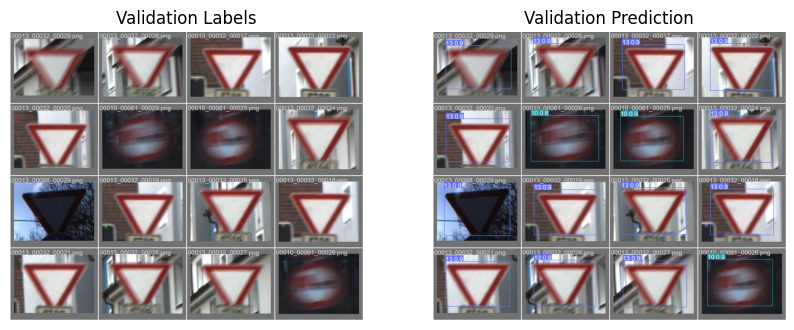

In [20]:
image1 = cv2.imread('/content/yolov5/runs/val/exp/val_batch0_labels.jpg')
image2 = cv2.imread('/content/yolov5/runs/val/exp/val_batch0_pred.jpg')

# Convert BGR to RGB (OpenCV loads images in BGR by default)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Plot images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns
axes[0].imshow(image1)
axes[0].axis('off')  # Hide axis
axes[0].set_title("Validation Labels")

axes[1].imshow(image2)
axes[1].axis('off')
axes[1].set_title("Validation Prediction")